In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the sample space for a die roll
sample_space = [1, 2, 3, 4, 5, 6]

# Probability of rolling a 3
favorable_outcomes = [3]
P_3 = len(favorable_outcomes) / len(sample_space)
print(f"Probability of rolling a 3: {P_3:.2f}")

# Probability of rolling an even number
favorable_outcomes = [2, 4, 6]
P_even = len(favorable_outcomes) / len(sample_space)
print(f"Probability of rolling an even number: {P_even:.2f}")


Probability of rolling a 3: 0.17
Probability of rolling an even number: 0.50


In [3]:
# Example: Flipping Two Coins
# Sample space for flipping two coins: {HH, HT, TH, TT}
sample_space = ['HH', 'HT', 'TH', 'TT']

# Probability of getting heads on the first coin
P_heads_1 = 2 / 4  # HH, HT
print(f"Probability of heads on the first coin: {P_heads_1:.2f}")

# Probability of getting heads on the second coin
P_heads_2 = 2 / 4  # HH, TH
print(f"Probability of heads on the second coin: {P_heads_2:.2f}")

# Probability of both heads (independent events)
P_both_heads = P_heads_1 * P_heads_2
print(f"Probability of getting heads on both coins: {P_both_heads:.2f}")


Probability of heads on the first coin: 0.50
Probability of heads on the second coin: 0.50
Probability of getting heads on both coins: 0.25


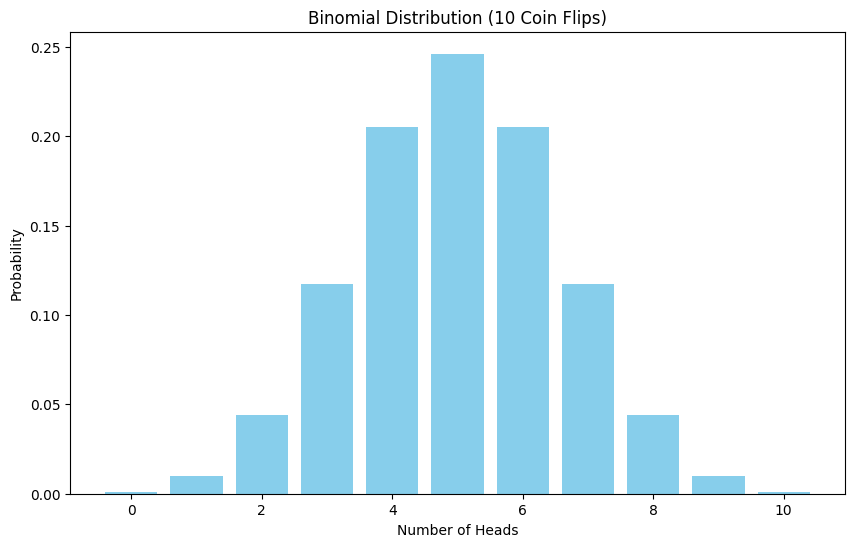

In [4]:
# Example: Binomial Distribution (Flipping a coin 10 times)
from scipy.stats import binom

# Parameters
n = 10  # Number of trials
p = 0.5  # Probability of success (heads)

# Generate probabilities
x = np.arange(0, n + 1)
probabilities = binom.pmf(x, n, p)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, probabilities, color='skyblue')
plt.title('Binomial Distribution (10 Coin Flips)')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.show()


In [5]:
# Example: Expected Value and Variance of a Discrete Random Variable
# Die roll probabilities
outcomes = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.array([1/6] * 6)

# Expected Value
expected_value = np.sum(outcomes * probabilities)
print(f"Expected Value: {expected_value:.2f}")

# Variance
variance = np.sum((outcomes - expected_value)**2 * probabilities)
print(f"Variance: {variance:.2f}")


Expected Value: 3.50
Variance: 2.92


In [6]:
# Monte Carlo Simulation: Rolling a die 10,000 times
np.random.seed(42)
rolls = np.random.randint(1, 7, size=10000)

# Calculate probabilities
unique, counts = np.unique(rolls, return_counts=True)
simulated_probabilities = counts / len(rolls)

# Display
for value, prob in zip(unique, simulated_probabilities):
    print(f"Value: {value}, Simulated Probability: {prob:.2f}")


Value: 1, Simulated Probability: 0.17
Value: 2, Simulated Probability: 0.17
Value: 3, Simulated Probability: 0.16
Value: 4, Simulated Probability: 0.17
Value: 5, Simulated Probability: 0.17
Value: 6, Simulated Probability: 0.17


In [7]:
# Define the sample space
sample_space = set(range(1, 7))  # Rolling a six-sided die

# Define two events
A = {2, 4, 6}  # Event A: Rolling an even number
B = {1, 2, 3}  # Event B: Rolling a number ≤ 3

print(f"Sample Space: {sample_space}")
print(f"Event A (Even numbers): {A}")
print(f"Event B (Numbers ≤ 3): {B}")


Sample Space: {1, 2, 3, 4, 5, 6}
Event A (Even numbers): {2, 4, 6}
Event B (Numbers ≤ 3): {1, 2, 3}


In [8]:
# Calculate intersection and union
intersection = A & B  # Common elements in A and B
union = A | B  # All unique elements in A and B

print(f"Intersection (A ∩ B): {intersection}")
print(f"Union (A ∪ B): {union}")

# Calculate probabilities
P_A = len(A) / len(sample_space)
P_B = len(B) / len(sample_space)
P_intersection = len(intersection) / len(sample_space)
P_union = len(union) / len(sample_space)

print(f"P(A): {P_A:.2f}")
print(f"P(B): {P_B:.2f}")
print(f"P(A ∩ B): {P_intersection:.2f}")
print(f"P(A ∪ B): {P_union:.2f}")


Intersection (A ∩ B): {2}
Union (A ∪ B): {1, 2, 3, 4, 6}
P(A): 0.50
P(B): 0.50
P(A ∩ B): 0.17
P(A ∪ B): 0.83


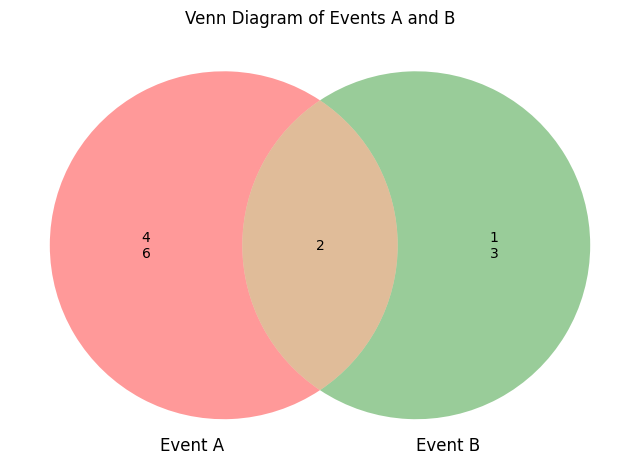

In [9]:
# Import Venn Diagram library
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([A, B], ('Event A', 'Event B'))
venn.get_label_by_id('10').set_text('\n'.join(map(str, A - B)))
venn.get_label_by_id('01').set_text('\n'.join(map(str, B - A)))
venn.get_label_by_id('11').set_text('\n'.join(map(str, intersection)))
plt.title('Venn Diagram of Events A and B')
plt.show()


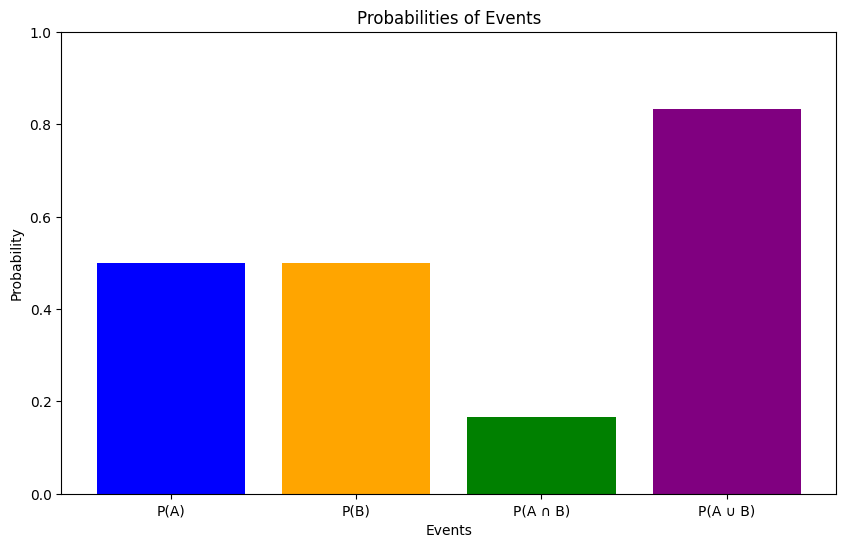

In [10]:
# Bar plot for probabilities
events = ['P(A)', 'P(B)', 'P(A ∩ B)', 'P(A ∪ B)']
probabilities = [P_A, P_B, P_intersection, P_union]

plt.figure(figsize=(10, 6))
plt.bar(events, probabilities, color=['blue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)
plt.title('Probabilities of Events')
plt.ylabel('Probability')
plt.xlabel('Events')
plt.show()


In [11]:
# Simulate rolling a die 10,000 times
np.random.seed(42)
rolls = np.random.randint(1, 7, size=10000)

# Define simulated events (we need to count occurrences of values in rolls)
sim_A = [r for r in rolls if r in A]  # Simulating event A (even numbers)
sim_B = [r for r in rolls if r in B]  # Simulating event B (numbers ≤ 3)

# Simulated intersection and union
sim_intersection = [r for r in sim_A if r in sim_B]  # Both events happening
sim_union = sim_A + [r for r in sim_B if r not in sim_A]  # Either A or B happening

# Simulated probabilities (counting occurrences)
sim_P_A = len(sim_A) / len(rolls)
sim_P_B = len(sim_B) / len(rolls)
sim_P_intersection = len(sim_intersection) / len(rolls)
sim_P_union = len(sim_union) / len(rolls)

print(f"Simulated P(A): {sim_P_A:.2f}")
print(f"Simulated P(B): {sim_P_B:.2f}")
print(f"Simulated P(A ∩ B): {sim_P_intersection:.2f}")
print(f"Simulated P(A ∪ B): {sim_P_union:.2f}")


Simulated P(A): 0.50
Simulated P(B): 0.50
Simulated P(A ∩ B): 0.17
Simulated P(A ∪ B): 0.83
